## Importing Libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Importing and reading the dataset

In [330]:
df = pd.read_csv(r'C:\Users\mayar\Desktop\Amit\Datasets\titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [331]:
df.info()
#age, embarked and cabin columns have some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [332]:
df['FamilySize'] = df['SibSp'] + df['Parch']

## Data Visualization

C:\Users\mayar\AppData\Local\Temp\ipykernel_35672\4010054886.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\mayar\AppData\Local\Temp\ipykernel_35672\4010054886.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


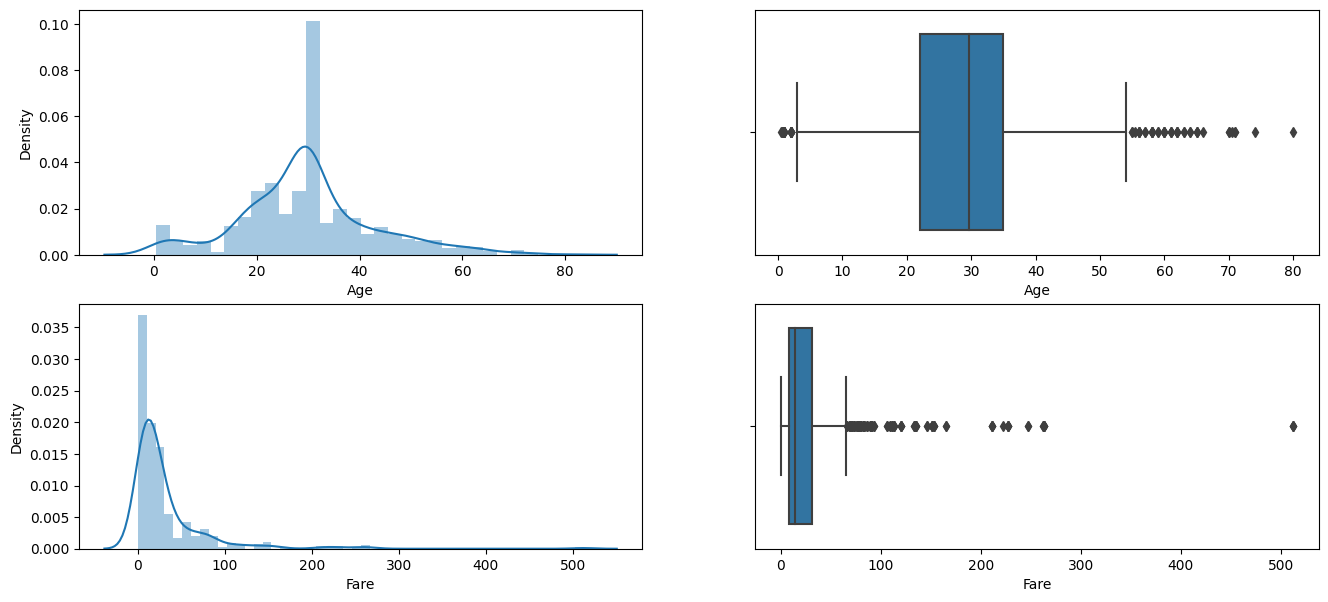

In [394]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Age'])
plt.subplot(2,2,2)
sns.boxplot(x=df['Age'], orient='h')

plt.subplot(2,2,3)
sns.distplot(df['Fare'])
plt.subplot(2,2,4)
sns.boxplot(x=df['Fare'], orient='h')

plt.show()

<AxesSubplot: xlabel='Age', ylabel='Pclass'>

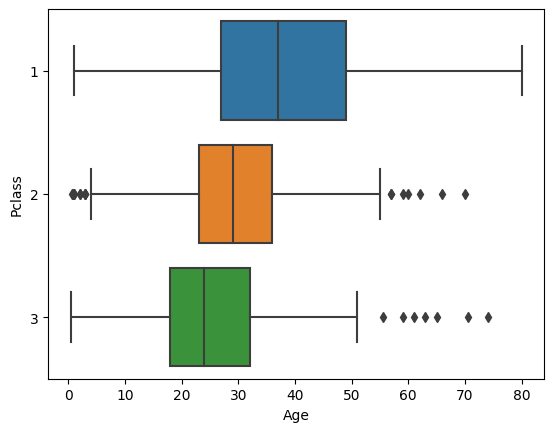

In [334]:
sns.boxplot(x=df['Age'], y=df['Pclass'], orient='h')

<AxesSubplot: xlabel='Age', ylabel='Sex'>

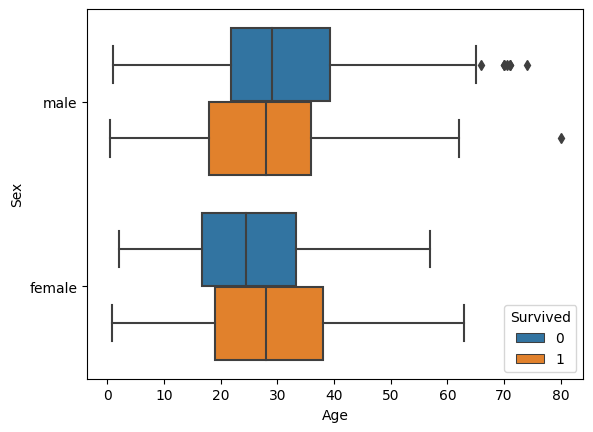

In [335]:
sns.boxplot(x=df['Age'], y=df['Sex'], hue=df['Survived'])
#most males died

<AxesSubplot: xlabel='Age', ylabel='Count'>

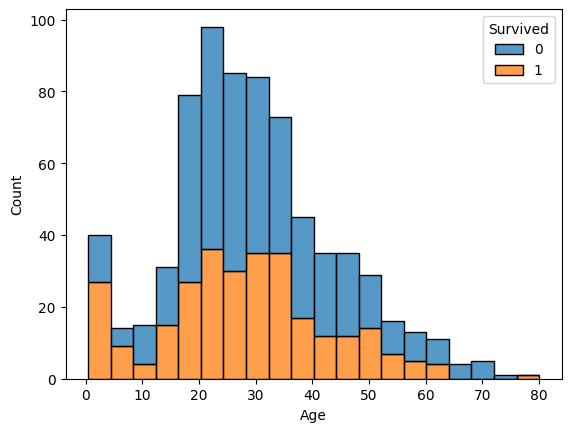

In [336]:
sns.histplot(x=df['Age'], hue=df['Survived'], multiple='stack')
#younger people have higher chance of survival

<AxesSubplot: xlabel='Pclass', ylabel='Percent'>

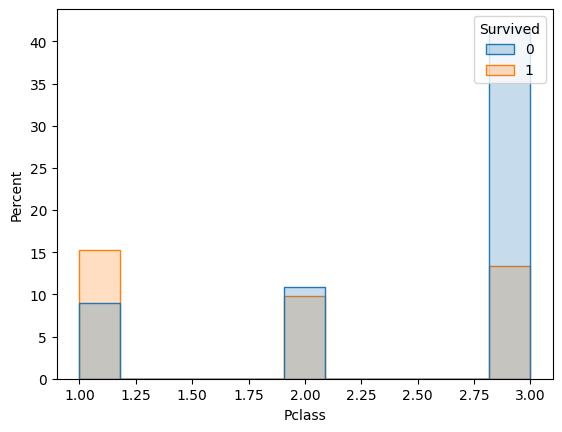

In [337]:
sns.histplot(x=df['Pclass'],stat='percent', hue=df['Survived'], element='step' ,discrete=False)
# %of survived 1st class passengers is higher

<AxesSubplot: xlabel='Fare', ylabel='Density'>

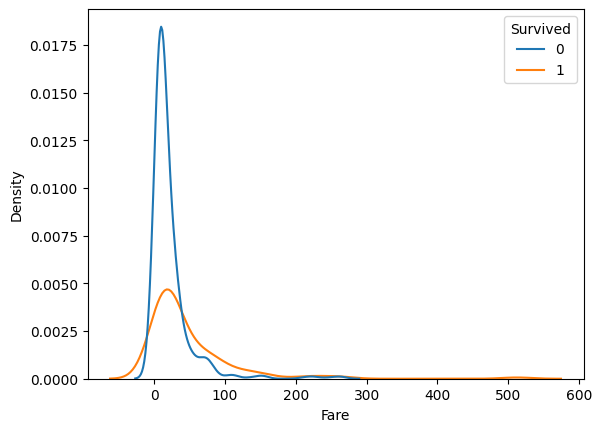

In [338]:
sns.kdeplot(x=df['Fare'], hue=df['Survived'])

<AxesSubplot: ylabel='Sex'>

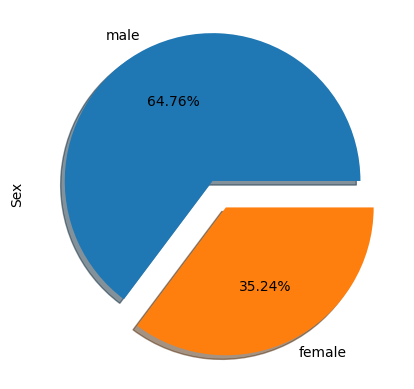

In [339]:
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%.2f%%', shadow=True)

<AxesSubplot: xlabel='Age', ylabel='Fare'>

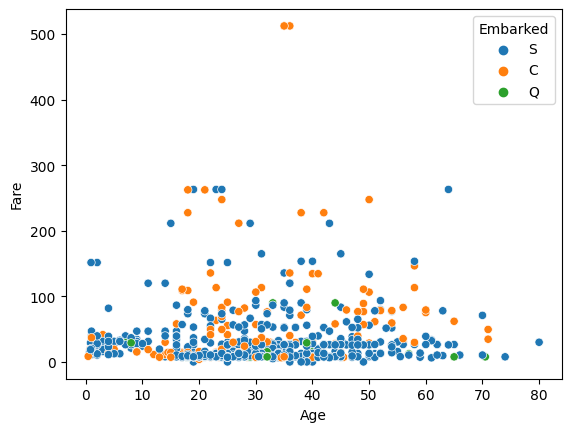

In [340]:
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Embarked'])

<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

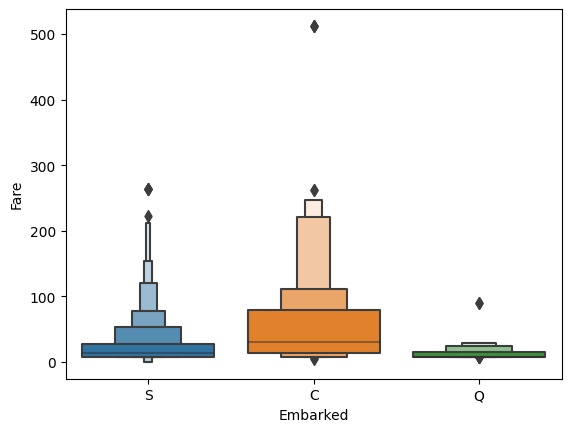

In [341]:
sns.boxenplot(x=df['Embarked'], y=df['Fare'])

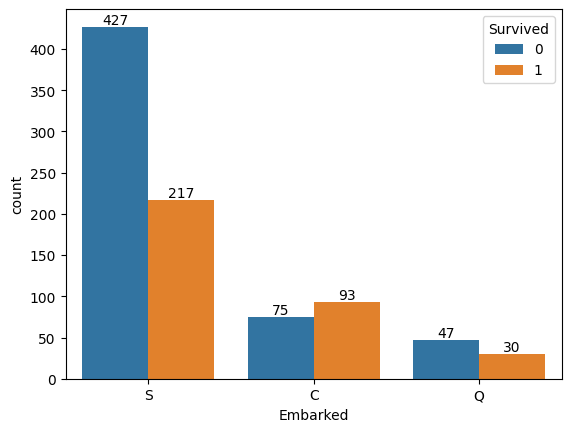

In [342]:
ax = sns.countplot(data=df, x=df['Embarked'], hue=df['Survived'])
for container in ax.containers:
    ax.bar_label(container)
# passengers from C have higher survival rate

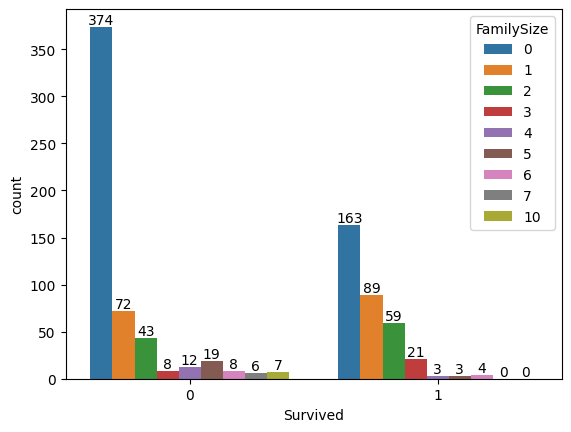

In [343]:
ax = sns.countplot(data=df, x=df['Survived'], hue=df['FamilySize'])
for container in ax.containers:
    ax.bar_label(container)
#more chance of survival for people of 1 to 3 relatives

C:\Users\mayar\AppData\Local\Temp\ipykernel_35672\2547992609.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=.8,linewidths=0.01, annot=True, cmap='YlGnBu', linecolor='black')


<AxesSubplot: >

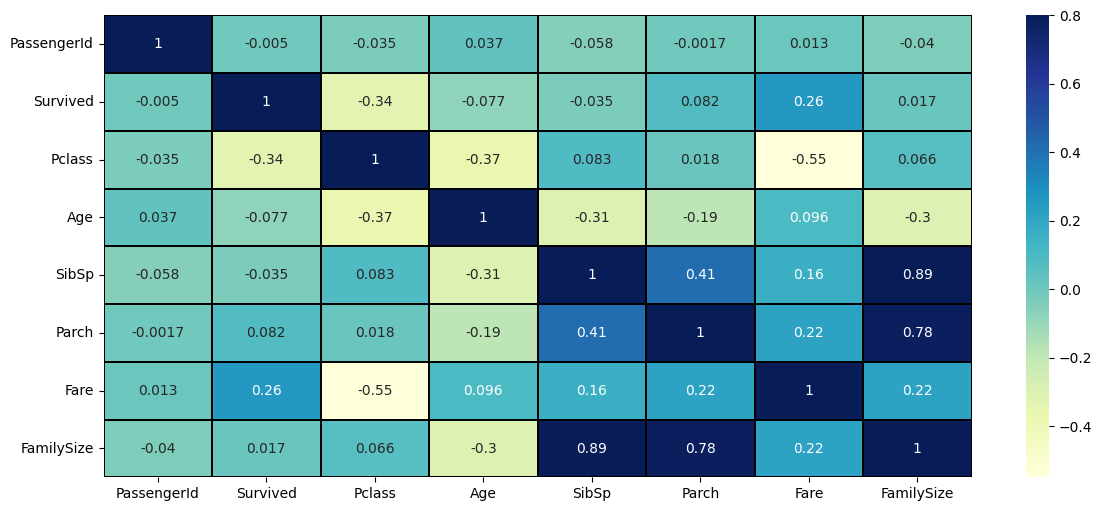

In [344]:
#correlation between features
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), vmax=.8,linewidths=0.01, annot=True, cmap='YlGnBu', linecolor='black')

## Data Preprocessing

In [345]:
df['Survived'].unique()
#O: didn't survive, 1:survived

array([0, 1], dtype=int64)

In [346]:
df['Pclass'].unique()
#1: 1st class, 2:2nd class, 3: 3rd class

array([3, 1, 2], dtype=int64)

In [347]:
df['Embarked'].unique()
#S: Southampton, C: Cherbourg, Q: Queenstown

array(['S', 'C', 'Q', nan], dtype=object)

In [348]:
df.isnull().sum().sort_values(ascending=False)
#age and cabin have lots of missing values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
FamilySize       0
dtype: int64

In [349]:
#Filling null values of age with mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())
#Filling null values of embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [350]:
#dropping unused columns
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [351]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


### Encoding Categorical data

In [352]:
cat_features = []
for col in list(df.columns):
    if (df[col].dtype=='object'):
        cat_features.append(col)

In [353]:
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [354]:
df.info()
#all numerical & no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int32  
 8   FamilySize  891 non-null    int64  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


### Splitting & Scaling

In [355]:
x = df.iloc[:, 1:].values
y=df['Survived'].values

In [356]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [357]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Modeling

### Logistic Regression Model

In [358]:
log=LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)

In [359]:
# Accuracy Score:
print(f"Accuracy Score: {100*accuracy_score(y_test,y_pred_log):.3f}%")

# Precision:
print(f"Precision Score: {100*precision_score(y_test,y_pred_log):.3f}%")

# Recall:
print(f"Recall Score: {100*recall_score(y_test,y_pred_log):.3f}%")

# F1 Score:
print(f"F1 Score: {100*f1_score(y_test,y_pred_log):.3f}%")


Accuracy Score: 79.888%
Precision Score: 73.913%
Recall Score: 73.913%
F1 Score: 73.913%


In [360]:
#Classification Report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



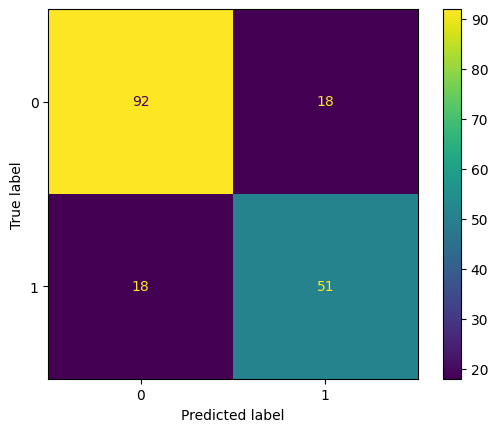

In [361]:
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Support Vector Machine (SVM)

In [384]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [385]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



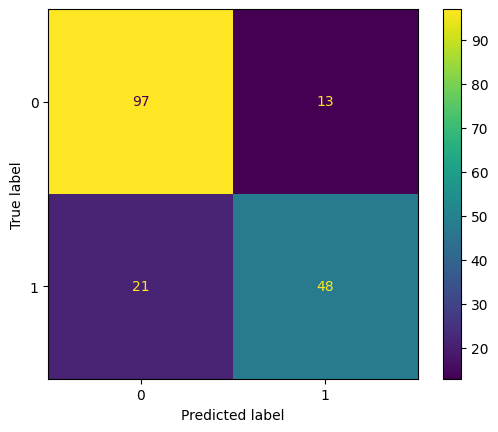

In [386]:
cm = confusion_matrix(y_test, y_pred_svm)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()
plt.show()

### KNN Classifier

In [365]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [366]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       110
           1       0.86      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



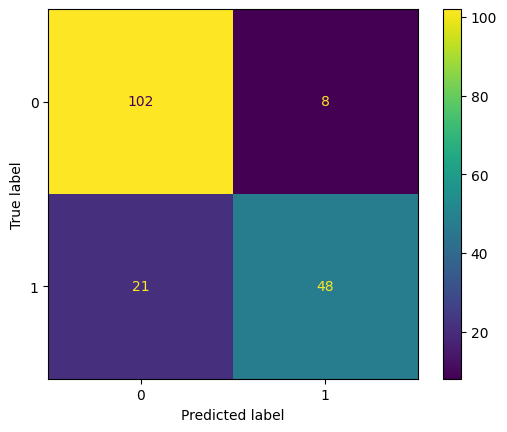

In [367]:
cm = confusion_matrix(y_test, y_pred_knn)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()